normalABP

IABP

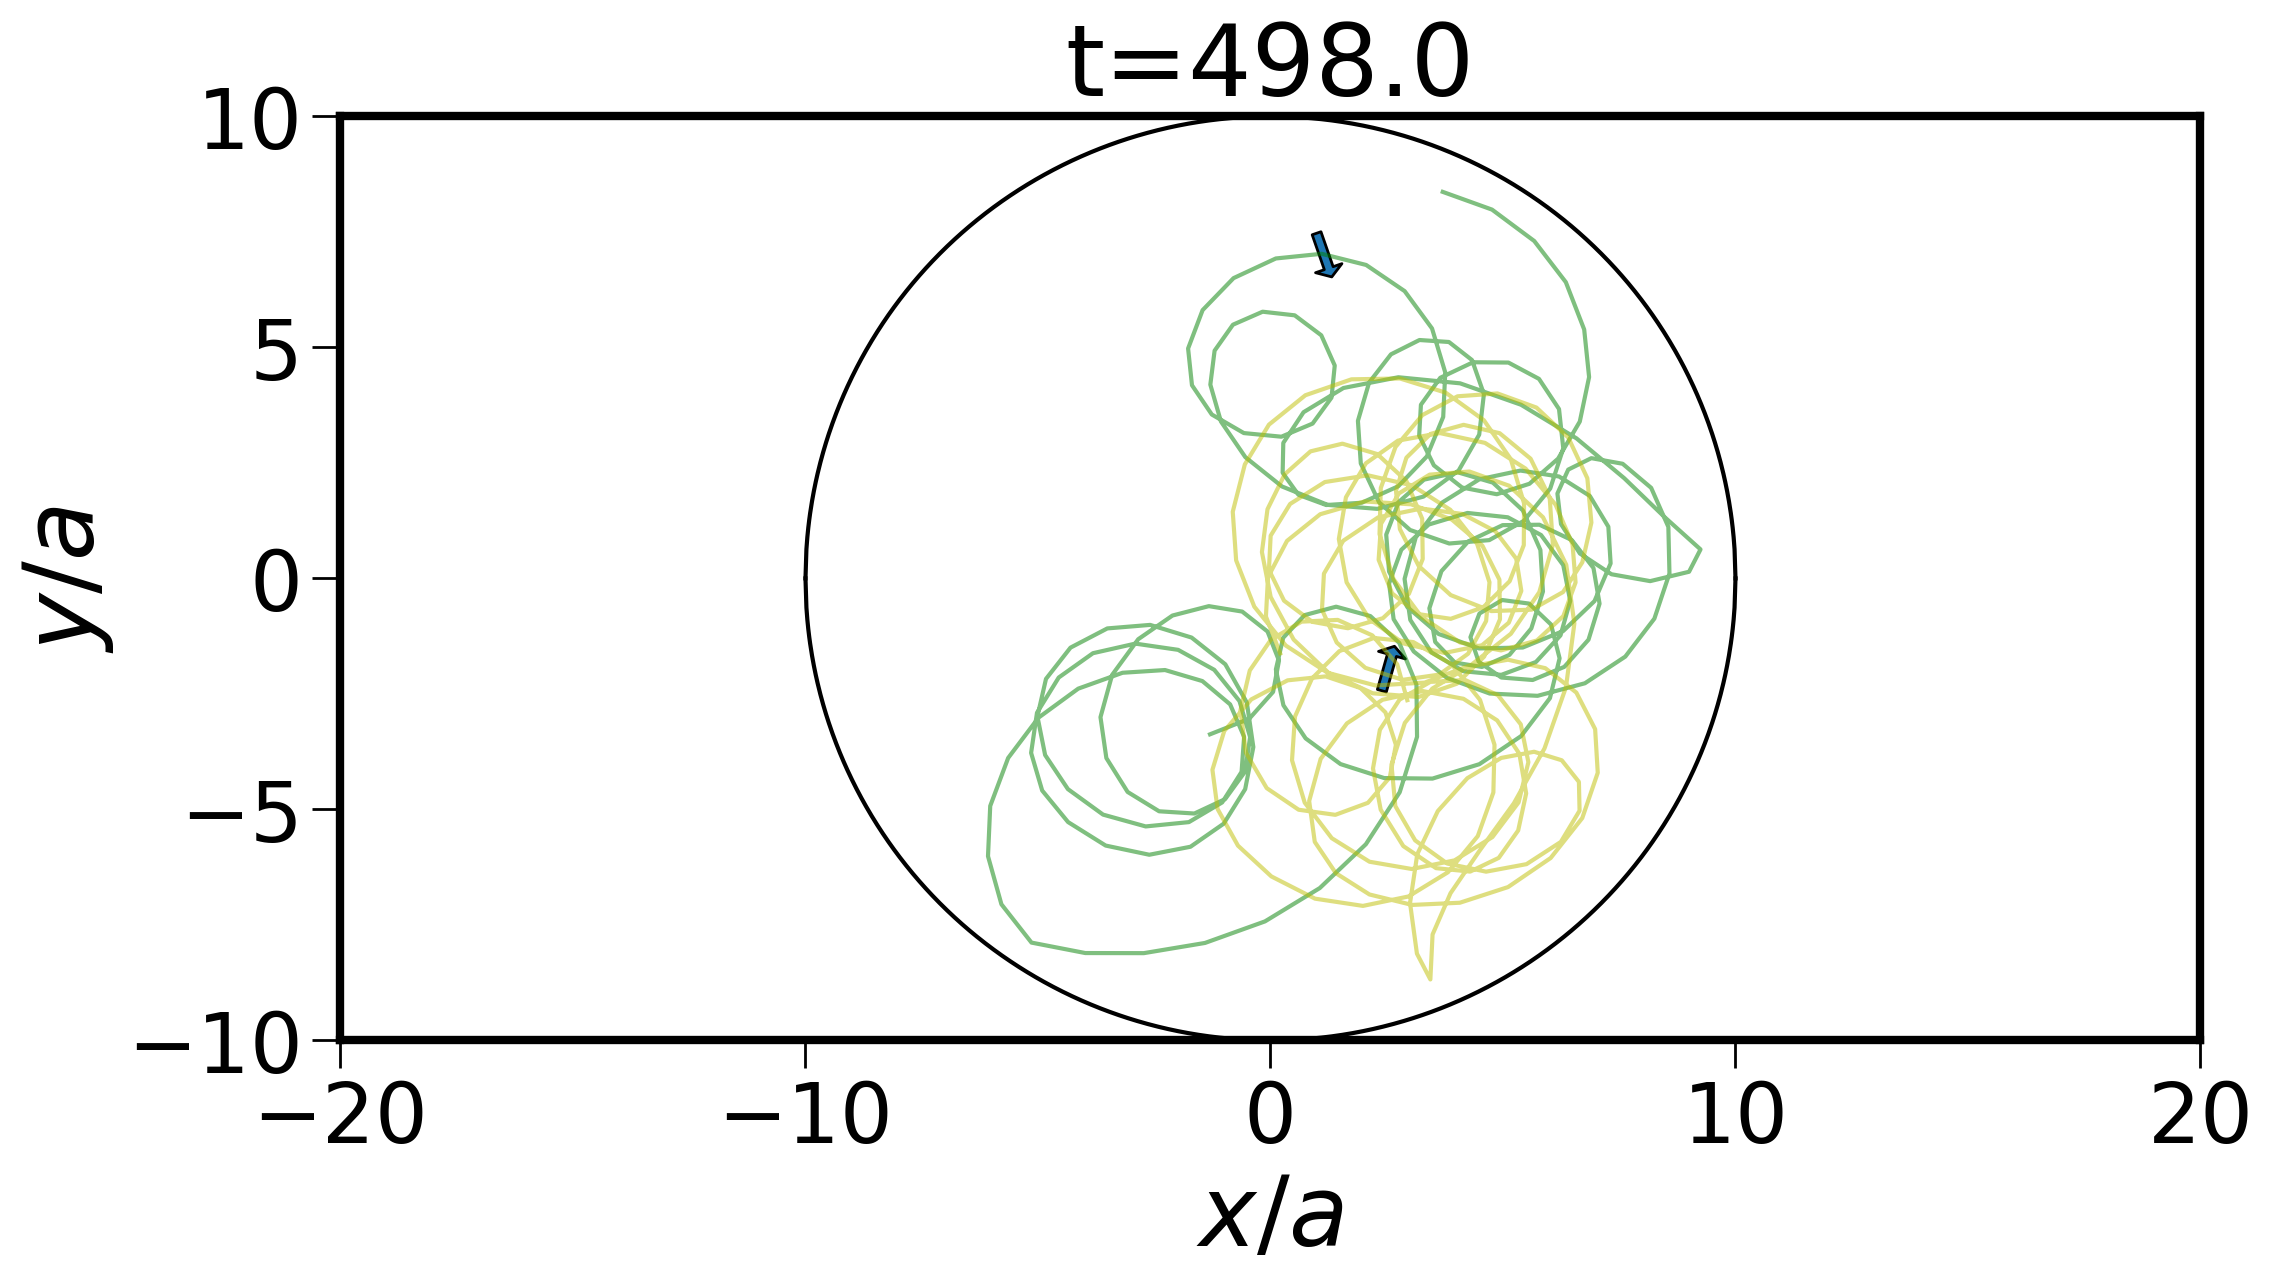

In [18]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
plt.rcParams["text.usetex"] =False
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import EllipseCollection
from matplotlib.collections import PatchCollection

cmap = matplotlib.colormaps["Greys"]
# Np=12800#8192#2048#

def make_animation():
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1,1,1)
    # ax.set_aspect('equal')
    def circleplot():
        ce=L*bit*0.5
        x = np.linspace(0,L+ce,500)
        y = np.sqrt(L*L-(x-ce)*(x-ce))
        plt.plot(x,y,"-",color="k",markersize=20)
        plt.plot(x,-y,"-",color="k",markersize=20)
        x=-x
        y=np.sqrt(L*L-(x+ce)*(x+ce))
        plt.plot(x,y,"-",color="k",markersize=20)
        plt.plot(x,-y,"-",color="k",markersize=20)
    # plt.rcParams["patch.linewidth"]=0.5
    # cir=Circle((0,0),L,fc='k')
    # ax.add_artist(cir)
    circleplot()
    title=plt.title("t")
    plt.xlim(-2*L, 2*L)
    plt.ylim(-L, L)
    #cbのために適当なマップをダス:;
    # Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
    # アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
    x, y,vx,vy,th = np.loadtxt("./stwmsssinR10.0_animelo0.01Ms10.000tau160.000bit0.000v01.0/tyouwaenn_lo0.010_tau160.000_m0.200_t1.dat", comments='#', unpack=True)

    xpast0=[]
    ypast0=[]
    xpast1=[]
    ypast1=[]
    line,=plt.plot(x,y,"-",markersize=5,color="g",alpha=0.5)
    line1,=plt.plot(x,y,"-",markersize=5,color="y",alpha=0.5)
    from matplotlib.patches import Arrow
    
    # p.set_array(lz)
    # C=plt.colorbar(p,label=r"$v_{x}$")

    #カラーバーの上下端を明確に操作したければこっち
    #速さは不明
    """
    from matplotlib.colors import Normalize
    from matplotlib.cm import  ScalarMappable
    norm = Normalize(vmin=-vminmax, vmax=vminmax)
    mappable = ScalarMappable(cmap=cm.bwr, norm=norm)
    C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
    mappable._A = []
    """
    p = PatchCollection([], cmap=matplotlib.cm.bwr, alpha=1.0,ec="k",animated=True)
    ax.add_collection(p)

    ax.spines['top'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    plt.xlabel(r"$x/a$",color='k', size=35)
    plt.ylabel(r"$y/a$",color='k', size=35)
    def init():
        """
        何もしない関数。Funkanimationのinitfunkに何も指定しないとupdate_animのj＝0を2回繰り返される.
        本来は軸設定をするところ;
        """
        pass
    def update_anim(j):
        """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

        Args:
            j (int): Funkanimationで渡される引数。0からfilemax;

        Returns:
            mappable: 時刻jでのマップ;
        """
        x, y,vx,vy ,th= np.loadtxt("./stwmsssinR10.0_animelo0.01Ms10.000tau160.000bit0.000v01.0/tyouwaenn_lo0.010_tau160.000_m0.200_t{}.dat".format(j+1), comments='#', unpack=True)
        # lz=(x*vy-y*vx)/np.sqrt(x*x+y*y)
        xpast0.append(x[0])
        ypast0.append(y[0])
        # tmin=np.max([0,j-100])
        line.set_data(xpast0[:j+1],ypast0[:j+1])
        xpast1.append(x[1])
        ypast1.append(y[1])
        line1.set_data(xpast1[:j+1],ypast1[:j+1])
        title.set_text("t={:.1f}".format(j*2))#plt.titleでもなぜか上手くいくことがある.
        patches=[]
        for i in range (2):
            arr=Arrow(x[i],y[i],np.cos(th[i]),np.sin(th[i]),fc="b")
            patches.append(arr)
        p.set_paths(patches)
        return [p]




    ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)
    ani.save("singleMs10t160r5.0.0.mp4",writer="ffmpeg")
    plt.show()
    
    

moji="stwmssnp"#粒子のfoldername.
moji2="stwre"#folder name.
lo=0.5
L=10#np.sqrt(Np*0.25/lo)
tau=40
bit=0.
# i=0 #0  1   2   3   4   5
v0=1
Ms=80
min=0#minを有限にする機能はまだ;
max=250
filenum=max-min
vminmax=0.5
vminmax2=0.05

make_animation()
#保存



IABPnovt you

0.448141


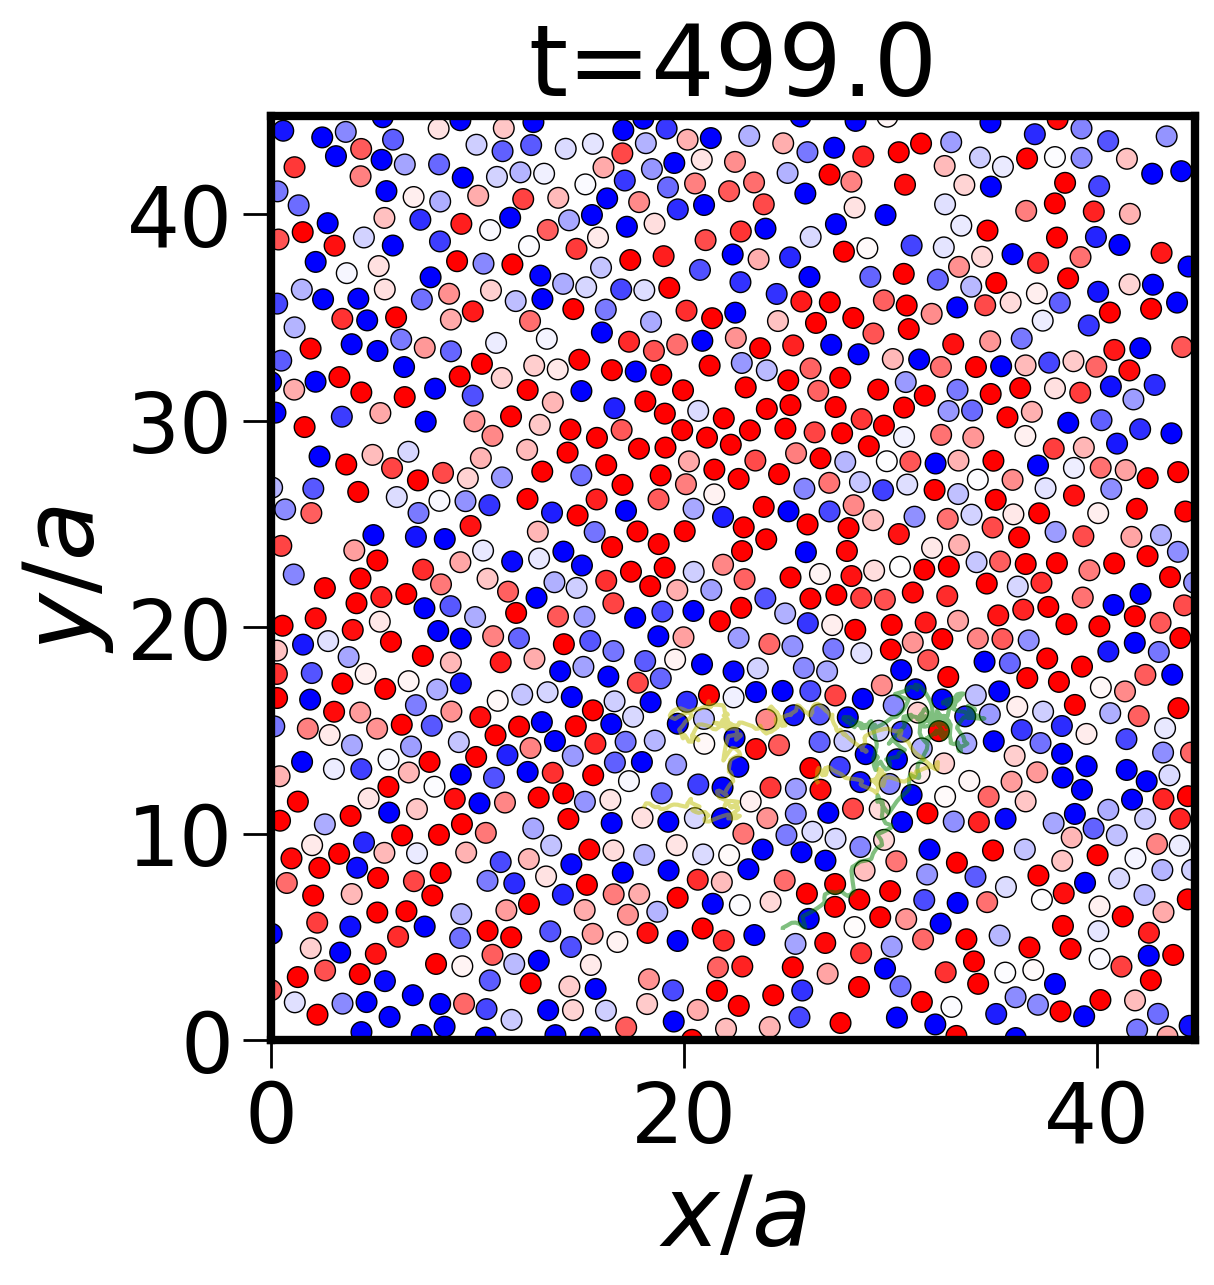

In [8]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
plt.rcParams["text.usetex"] =False
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import EllipseCollection
from matplotlib.collections import PatchCollection

cmap = matplotlib.colormaps["Greys"]
# Np=12800#8192#2048#

def make_animation(moji,moji2,lo,L,tau,v0,Ms,filenum,vminmax,fname,vminmax2,Mg):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    title=plt.title("t")
    plt.xlim(0,L)
    plt.ylim(0, L)
    #cbのために適当なマップをダス:;
    # Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
    # アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
    x, y,vx ,vy= np.loadtxt("../{}/{}_animelo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/tyouwaenn_lo{:.3f}_tau{:.3f}_m{:.3f}_t{:n}.dat".format(moji2,moji,lo,Ms,tau,v0,lo,tau,Mg,0), comments='#', unpack=True)
    a= np.loadtxt("../{}/{}_animelo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/tyokkei.dat".format(moji2,moji,lo,Ms,tau,v0), comments='#', unpack=True)
    vminma=np.amax(np.abs(vx))
    print(vminma)
    xpast0=[]
    ypast0=[]
    xpast1=[]
    ypast1=[]
    line,=plt.plot(x,y,"-",markersize=5,color="g",alpha=0.5)
    line1,=plt.plot(x,y,"-",markersize=5,color="y",alpha=0.5)
    # vminmax=2
    th=np.zeros_like(x)
    p = EllipseCollection(a[1:],a[1:],th,units="xy", cmap=matplotlib.cm.bwr,transOffset=ax.transData,animated=True, alpha=1.0,fc='g',ec="k",lw=0.5,offsets=(np.c_[x,y]))
    p.set_clim(vmin=-vminmax, vmax=vminmax) 
    #animated=true?
    ax.add_collection(p)
    # p.set_array(lz)
    # C=plt.colorbar(p,label=r"$v_{x}$")

    #カラーバーの上下端を明確に操作したければこっち
    #速さは不明
    """
    from matplotlib.colors import Normalize
    from matplotlib.cm import  ScalarMappable
    norm = Normalize(vmin=-vminmax, vmax=vminmax)
    mappable = ScalarMappable(cmap=cm.bwr, norm=norm)
    C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
    mappable._A = []
    """
        

    ax.spines['top'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    plt.xlabel(r"$x/a$",color='k', size=35)
    plt.ylabel(r"$y/a$",color='k', size=35)
    def init():
        """
        何もしない関数。Funkanimationのinitfunkに何も指定しないとupdate_animのj＝0を2回繰り返される.
        本来は軸設定をするところ;
        """
        pass
    def update_anim(j):
        """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

        Args:
            j (int): Funkanimationで渡される引数。0からfilemax;

        Returns:
            mappable: 時刻jでのマップ;
        """
        x, y,vx ,vy= np.loadtxt("../{}/{}_animelo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/tyouwaenn_lo{:.3f}_tau{:.3f}_m{:.3f}_t{:n}.dat".format(moji2,moji,lo,Ms,tau,v0,lo,tau,Mg,j), comments='#', unpack=True)
        # lz=(x*vy-y*vx)/np.sqrt(x*x+y*y)
        xpast0.append(x[0])
        ypast0.append(y[0])
        # tmin=np.max([0,j-100])
        line.set_data(xpast0[:j+1],ypast0[:j+1])
        xpast1.append(x[1])
        ypast1.append(y[1])
        line1.set_data(xpast1[:j+1],ypast1[:j+1])
        p.set_offsets(np.c_[x,y])
        
        p.set_array(vx)
        title.set_text("t={:.1f}".format(j*a[0]))#plt.titleでもなぜか上手くいくことがある.
        return [p]



    ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)
    ani.save("./{}/{}lo{}tau{}Ms{}v0{}colmax{}minmax{}.mp4".format(fname,moji,lo,tau,Ms,v0,vminmax,vminma),writer="ffmpeg")
    plt.show()
    '''
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1,1,1)
    circleplot()
    title=plt.title("t")
    plt.xlim(-2*L, 2*L)
    plt.ylim(-L, L)
    #cbのために適当なマップをダス:;
    # Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
    # アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
    t,vx = np.loadtxt("../{}/{}R{:.1f}_animelo{:.2f}Ms{:.3f}tau{:.3f}bit{:.3f}v0{:.1f}/vol_lo{:.3f}_v0{:.1f}_tau{:.3f}_m{:.3f}_t{:n}.dat".format(moji2,moji,L,lo,Ms,tau,bit,v0,lo,v0,tau,Mg,0), comments='#', unpack=True)
    # lz=(x*vy-y*vx)/np.sqrt(x*x+y*y)
    vminma=np.amax(np.abs(vx))
    print(vminma)
    patchess=[]
    circleplot()
    bituzu=0.25
    xlen=(1+bit*0.5)*L
    Mx=(int)(xlen*2/bituzu)
    import matplotlib.patches as pat
    for i in range(len(vx)):
        ix=i%Mx
        xi=-xlen+ix*bituzu
        yi=-L+(int)((i-ix)/Mx)*bituzu
        rec=pat.Rectangle((xi,yi),bituzu,bituzu,0,rotation_point='xy')
        patchess.append(rec)
    p=PatchCollection(patchess, cmap=matplotlib.cm.bwr, alpha=1.0,animated=True)
    p.set_clim(vmin=-vminmax2, vmax=vminmax2) 
    #animated=true?
    ax.add_collection(p)
    # p.set_array(lz)
    # C=plt.colorbar(p,label=r"$v_{x}$")

    #カラーバーの上下端を明確に操作したければこっち
    #速さは不明
    """
    from matplotlib.colors import Normalize
    from matplotlib.cm import  ScalarMappable
    norm = Normalize(vmin=-vminmax, vmax=vminmax)
    mappable = ScalarMappable(cmap=cm.bwr, norm=norm)
    C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
    mappable._A = []
    """
        

    ax.spines['top'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    plt.xlabel(r"$x/a$",color='k', size=35)
    plt.ylabel(r"$y/a$",color='k', size=35)

    def update_anim2(j):
        """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

        Args:
            j (int): Funkanimationで渡される引数。0からfilemax;

        Returns:
            mappable: 時刻jでのマップ;
        """
        t,vx = np.loadtxt("../{}/{}R{:.1f}_animelo{:.2f}Ms{:.3f}tau{:.3f}bit{:.3f}v0{:.1f}/vol_lo{:.3f}_v0{:.1f}_tau{:.3f}_m{:.3f}_t{:n}.dat".format(moji2,moji,L,lo,Ms,tau,bit,v0,lo,v0,tau,Mg,j), comments='#', unpack=True)
        p.set_array(vx)
        title.set_text("t={:.1f}".format(t[0]))#plt.titleでもなぜか上手くいくことがある.
        return [p]



    ani = FuncAnimation(fig, update_anim2,init_func=init(), interval=100, blit=True, frames = filenum)
    ani.save("./{}/vol{}lo{}tau{}Ms{}v0{}bit{}colmax{}minmax{}.mp4".format(fname,moji,lo,tau,Ms,v0,bit,vminmax2,vminma),writer="ffmpeg")
    plt.show()'''
    

moji="ppn4"#粒子のfoldername.
moji2="iABPre"#folder name.
lo=0.5
Np=1000
L=np.sqrt(Np/lo)
tau=200
v0=1
Ms=80
min=0#minを有限にする機能はまだ;
max=500
filenum=max-min
vminmax=0.1
vminmax2=0.05
fname="IABP"
from os import makedirs
makedirs('{}'.format(fname), exist_ok=True)
# for i in range(len(bit)):
make_animation(moji,moji2,lo,L,tau,v0,Ms,filenum,vminmax,fname,vminmax2,0)
#保存

